In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files #позволяет с локального компьютера загрузить в колаб какие то файлы
uploaded = files.upload()
     

Saving X_test.csv to X_test.csv
Saving X_train.csv to X_train.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv


In [ ]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')


In [ ]:
#размерность
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6598, 11) (4401, 11) (6598, 2) (4401, 2)


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in X_train:
  if (X_train[i].dtype=='object'):
    X_train[i] = le.fit_transform(X_train[i])
X_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,6045,0,0,3,3,266,5,0,0,5,1590
1,44,4,2,2,1,174,2,1,1,44,1556
2,7940,4,1,3,1,154,10,0,1,10,5674
3,1596,4,2,3,3,158,3,2,0,27,1207
4,4395,0,0,4,3,175,3,1,1,7,4833


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in X_test:
  if (X_test[i].dtype=='object'):
    X_test[i] = le.fit_transform(X_test[i])
X_test.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,6811,3,2,4,2,259,5,1,0,7,1032
1,4320,4,2,2,5,133,3,2,0,4,5902
2,5732,4,1,2,4,191,5,2,0,4,4243
3,7429,3,2,3,2,221,3,1,1,10,4126
4,2191,3,0,3,5,230,2,1,0,38,2890


In [ ]:
y_train.head()

,ID,Reached.on.Time_Y.N
0,6045,0
1,44,1
2,7940,1
3,1596,1
4,4395,1


In [ ]:
X_train = X_train.drop(['Mode_of_Shipment','Gender'],axis = 1)
X_test = X_test.drop(['Mode_of_Shipment','Gender'],axis = 1)

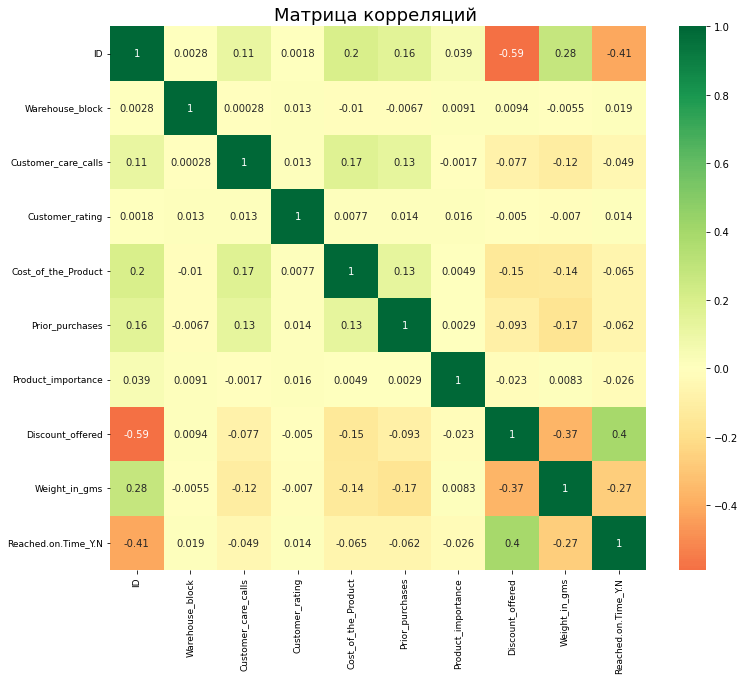

In [ ]:
train = X_train.merge(y_train, left_on='ID', right_on='ID', how='inner')

import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), xticklabels=train.corr().columns, yticklabels=train.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Матрица корреляций ', fontsize=18)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()
     
#отвратительные признаки Mode of shipment и gender - удаляю (до удаления accuracy 0.63) - оно не поменялось никак, поэтому возвращать не буду, всё равно фигня - этот датасет сложный

In [ ]:
X_train = X_train.drop(['ID'],axis = 1)
y_train = y_train.drop(['ID'],axis = 1)
X_test = X_test.drop(['ID'],axis = 1)
y_test = y_test.drop(['ID'],axis = 1)

In [ ]:
#моделька
model = LogisticRegression()
model.fit(X_train, y_train)
answers_pred = model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model.coef_

array([[ 3.00150893e-02, -4.74200333e-02,  5.22804172e-02,
        -3.88617424e-05, -5.23904812e-02, -3.26170604e-02,
         1.21607841e-01, -1.63576957e-04]])

In [ ]:
model.intercept_

array([0.0697441])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,answers_pred))
#почти ни один признак не являлся значащим

0.6387184730743013


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test, answers_pred)

array([[1050,  725],
       [ 865, 1761]])

In [ ]:
r = 1050/(1050+865)
p = 1050/(1050+725)
print('accuracy:',(1050+1761)/(1050+1761+865+725))
print('recall:',r)
print('precision:',p)
print('f1',2*r*p/(r+p))

accuracy: 0.6387184730743013
recall: 0.5483028720626631
precision: 0.5915492957746479
f1 0.5691056910569106


In [ ]:
recall_score(y_test, answers_pred)

0.6706016755521707

In [ ]:
precision_score(y_test, answers_pred)

0.7083668543845535

In [ ]:
f1_score(y_test, answers_pred)

0.6889671361502347

In [ ]:
#я не знаю как получилось но стало лучше
#метрики по меркам нейросетей отвратительные, но для конкретного датасета с его плохими зависимостями они неплохи